In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')
    plt.show()

In [3]:
sep_coins = cv2.imread('pennies.jpg')

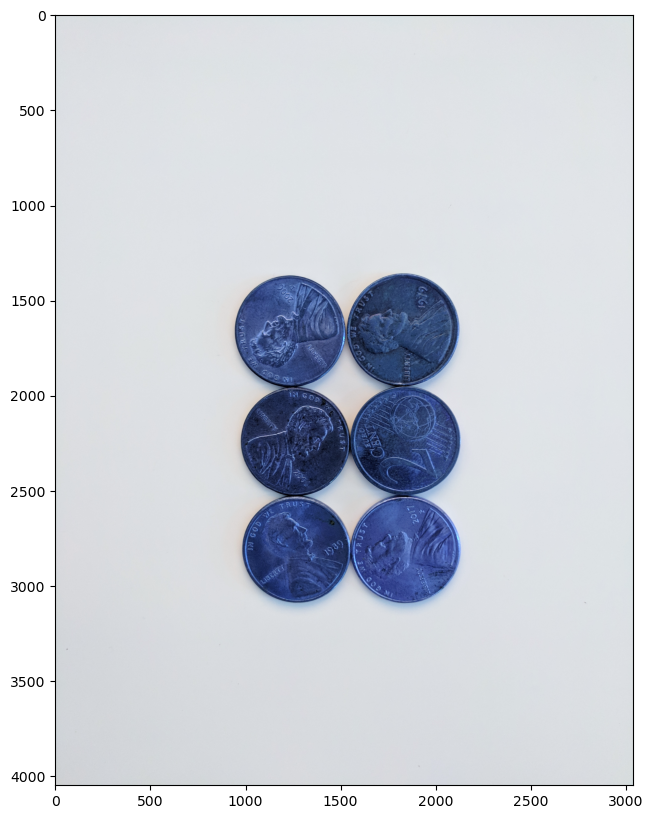

In [4]:
display(sep_coins)

In [20]:
# Median Blur
sep_blur = cv2.medianBlur(sep_coins,25)
#Convert it to gray scale
sep_gray = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)
#Binary Threshold
ret, sep_threshold = cv2.threshold(sep_gray, 160,255, cv2.THRESH_BINARY_INV)
#Find contour
contours, hierarchy = cv2.findContours(sep_threshold.copy(),cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i, (255,0,0),10)

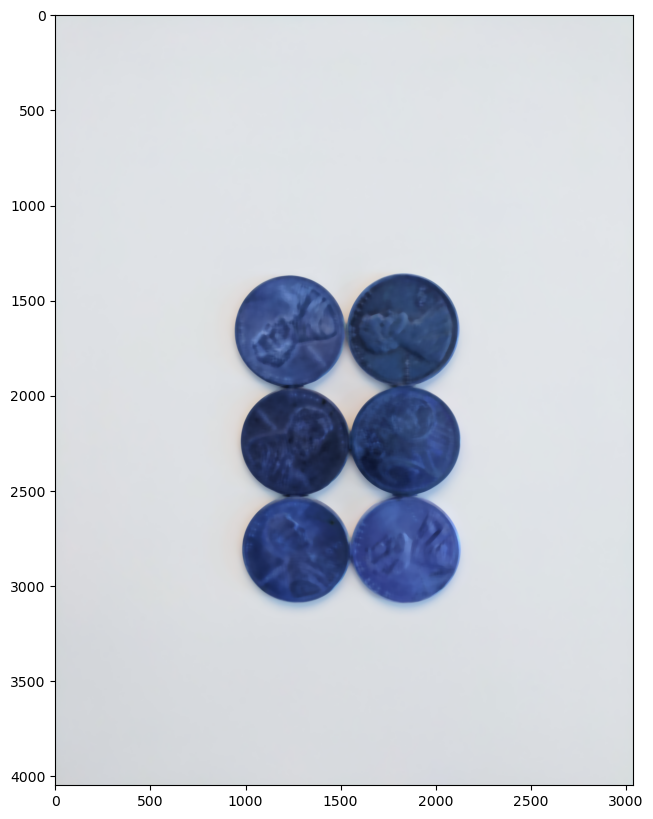

In [12]:
display(sep_blur)

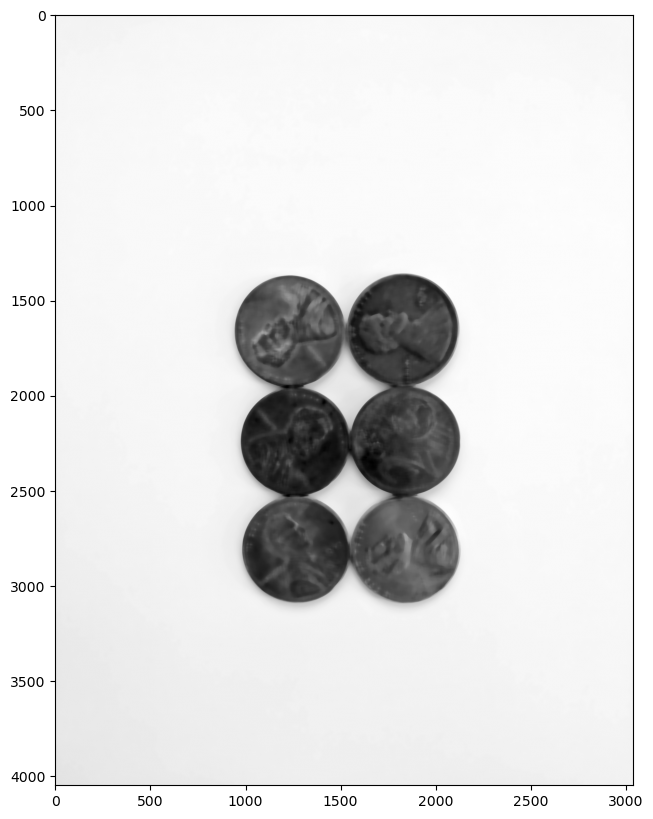

In [13]:
display(sep_gray)

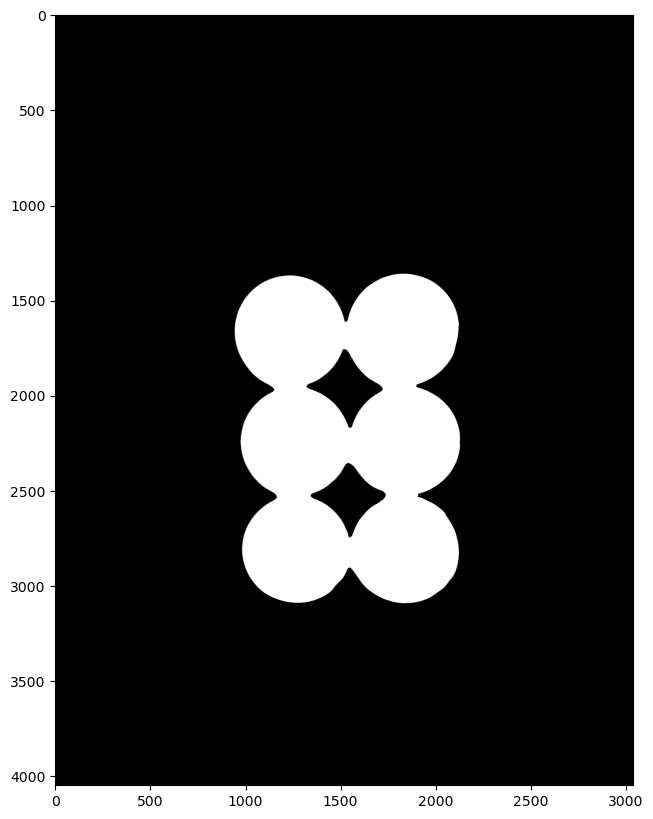

In [15]:
display(sep_threshold)

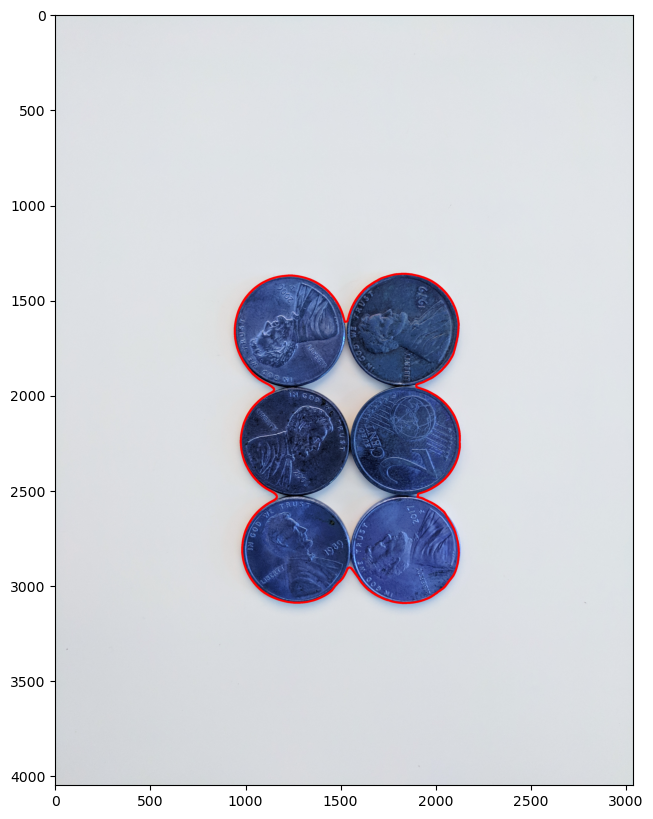

In [19]:
display(sep_coins)

# WATERSHED ALGORITHM

In [118]:
#STEP 1: Read the image
img = cv2.imread('pennies.jpg')

In [119]:
img = cv2.medianBlur(img, 35)

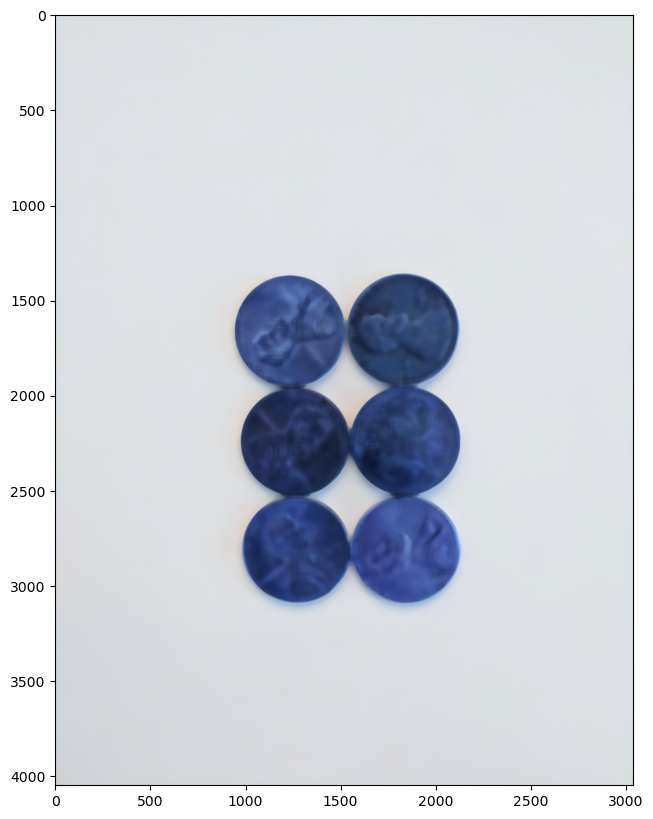

In [120]:
display(img)

In [121]:
# CONVERT TO GRAY SCALE
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [122]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

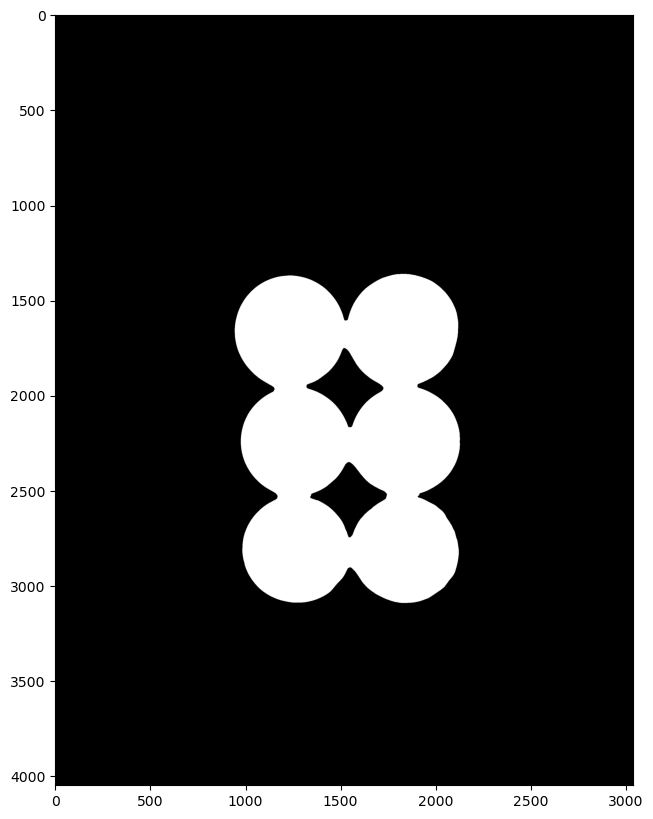

In [123]:
display(thresh, cmap='gray')

In [124]:
#NOISE REMOVAL
kernel = np.ones(shape=(3,3), dtype=np.uint8)

In [125]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [126]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel, iterations=2)

In [127]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)

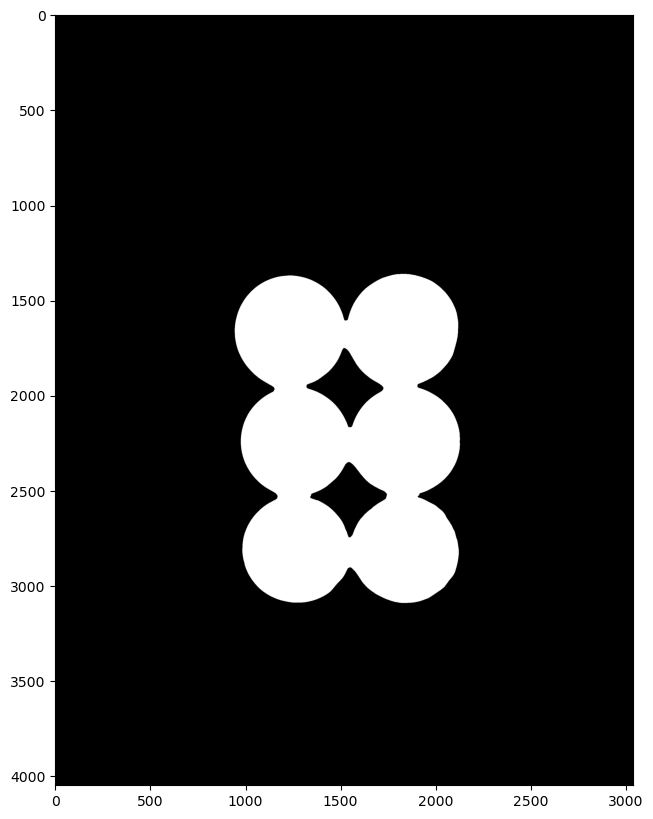

In [128]:
display(opening)

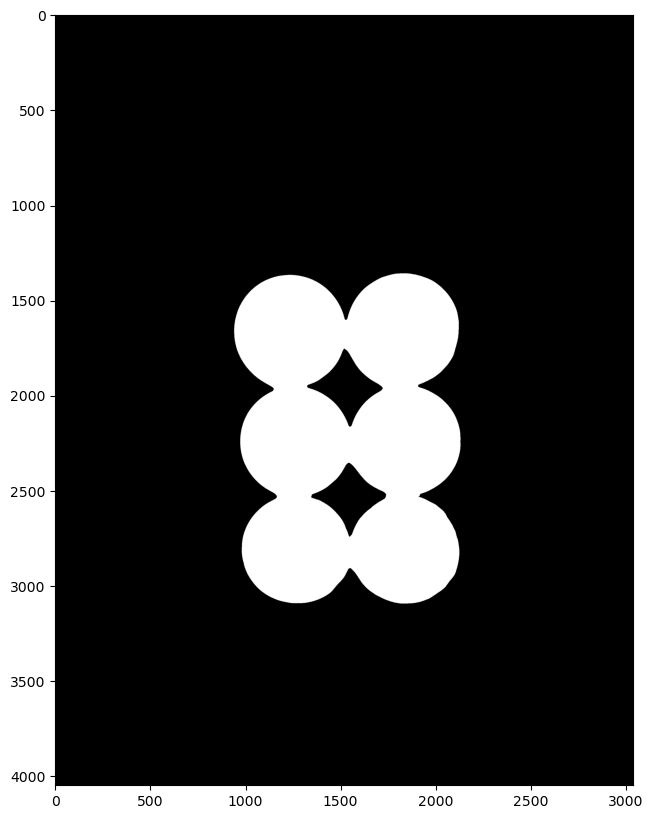

In [129]:
display(sure_bg)

In [130]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2,5)

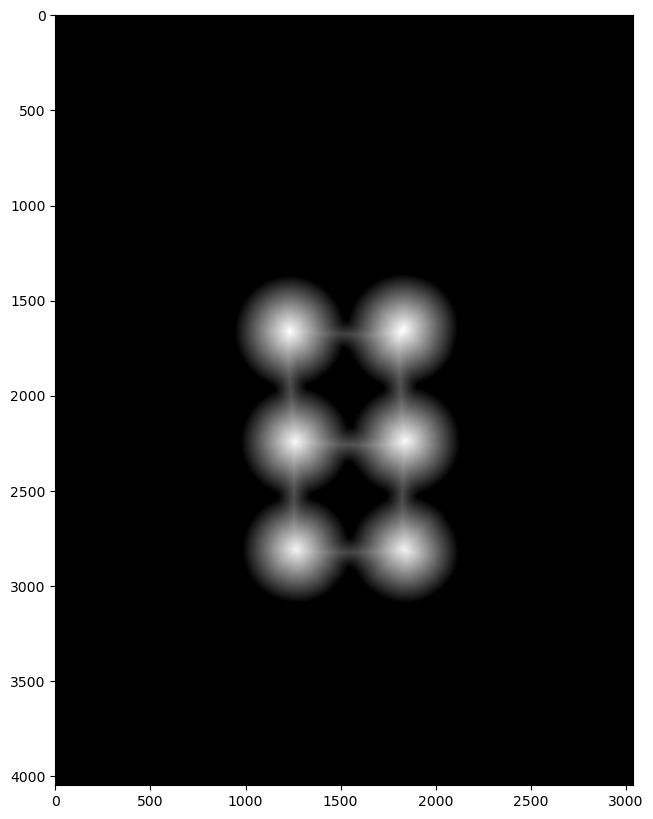

In [131]:
display(dist_transform)

In [132]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(),255,0)

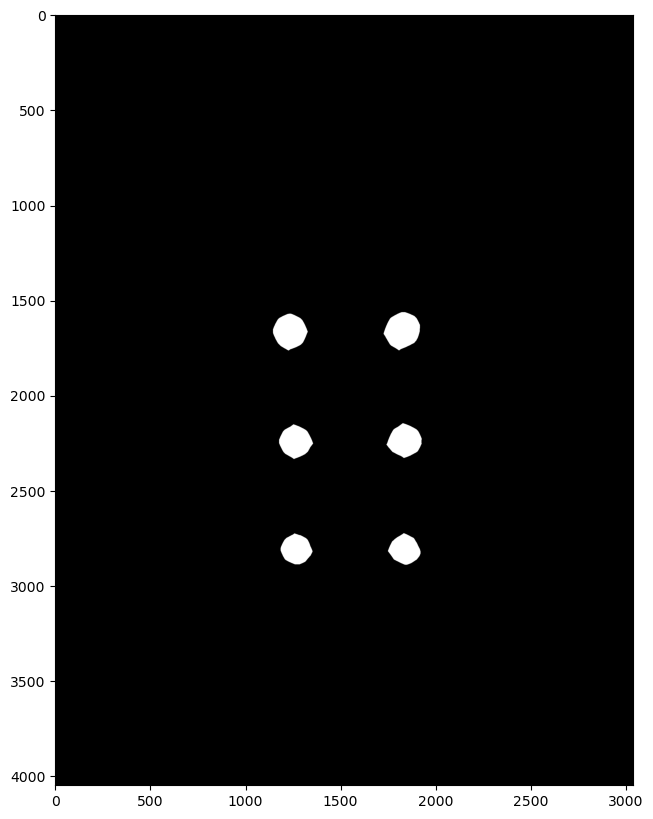

In [133]:
display(sure_fg)

In [134]:
# Display and find the unknown region
sure_fg = np.uint8(sure_fg)

In [135]:
unknown = cv2.subtract(sure_bg, sure_fg)

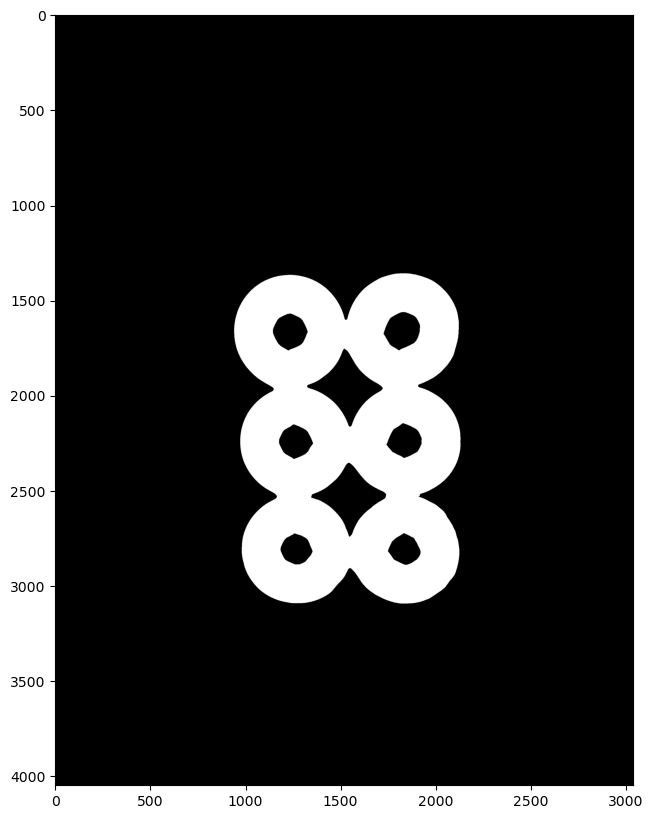

In [136]:
display(unknown)

In [137]:
ret, markers = cv2.connectedComponents(sure_fg)

In [138]:
markers = markers + 1

In [139]:
markers[unknown==255] = 0

In [140]:
markers

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], shape=(4048, 3036), dtype=int32)

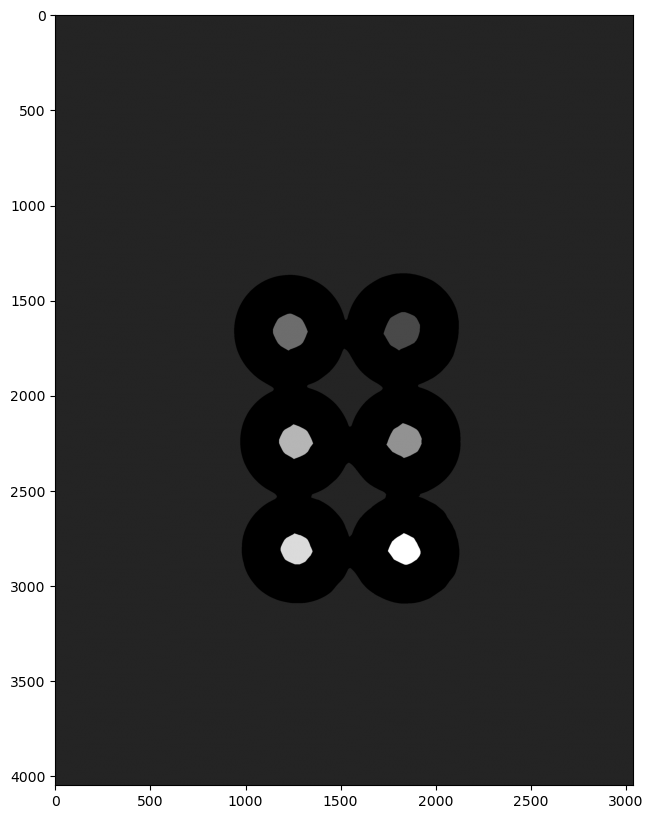

In [141]:
display(markers, cmap='gray')

In [142]:
markers = cv2.watershed(img, markers)

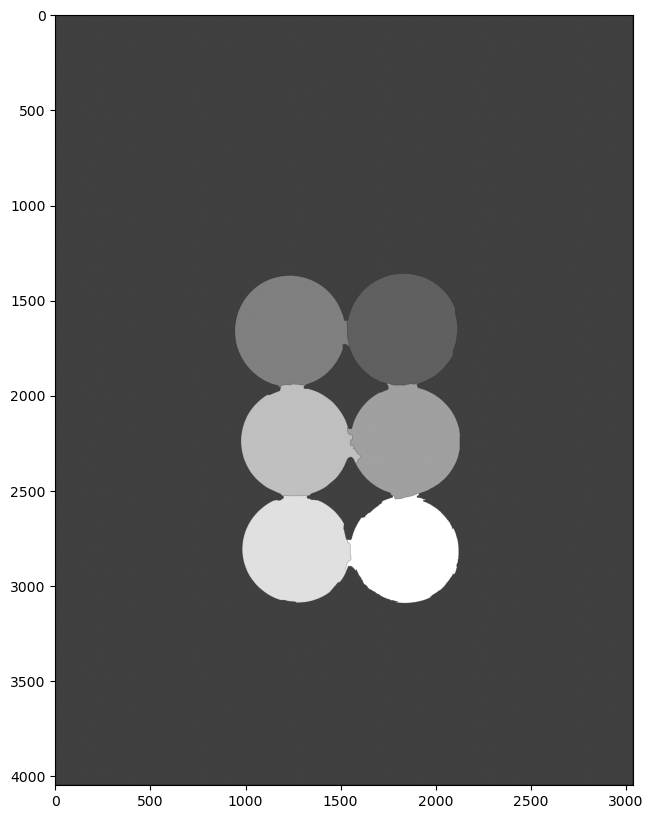

In [143]:
display(markers)

In [144]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i,(255,0,0),10)

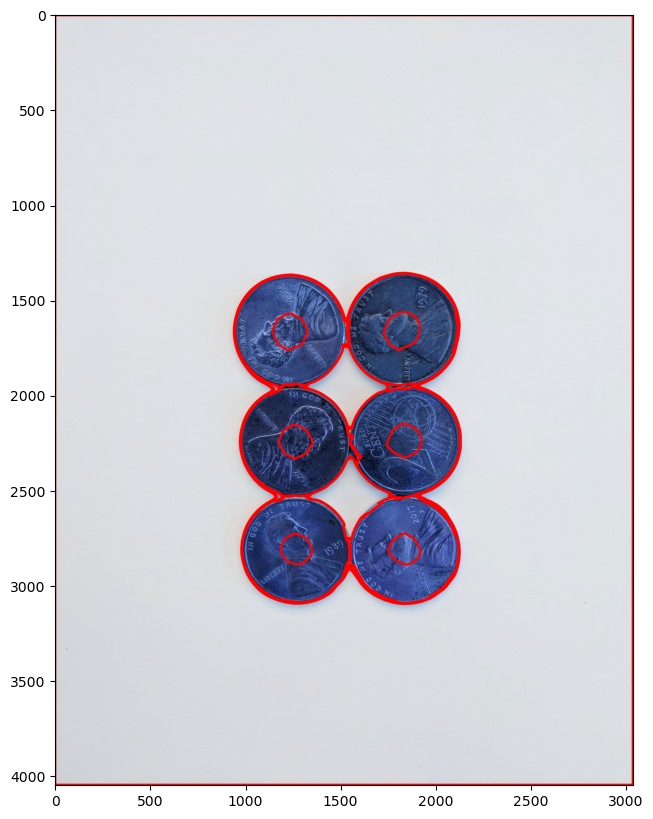

In [145]:
display(sep_coins)